In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_trivy import create_df

In [2]:
df= create_df()
print(df)

           VulnerabilityID     PkgName        Status  Severity  \
0            CVE-2011-3374         apt      affected       LOW   
1      TEMP-0841856-B18BAF        bash      affected       LOW   
2           CVE-2024-28085    bsdutils         fixed      HIGH   
3            CVE-2022-0563    bsdutils      affected       LOW   
4            CVE-2016-2781   coreutils  will_not_fix       LOW   
...                    ...         ...           ...       ...   
16932       CVE-2024-28085    uuid-dev         fixed      HIGH   
16933        CVE-2022-0563    uuid-dev      affected       LOW   
16934       CVE-2021-31879        wget      affected    MEDIUM   
16935       CVE-2023-45853      zlib1g  will_not_fix  CRITICAL   
16936       CVE-2023-45853  zlib1g-dev  will_not_fix  CRITICAL   

                               Container  
0      jsons/trivy/sboms/nginx_sbom.json  
1      jsons/trivy/sboms/nginx_sbom.json  
2      jsons/trivy/sboms/nginx_sbom.json  
3      jsons/trivy/sboms/nginx_sbom

<Axes: >

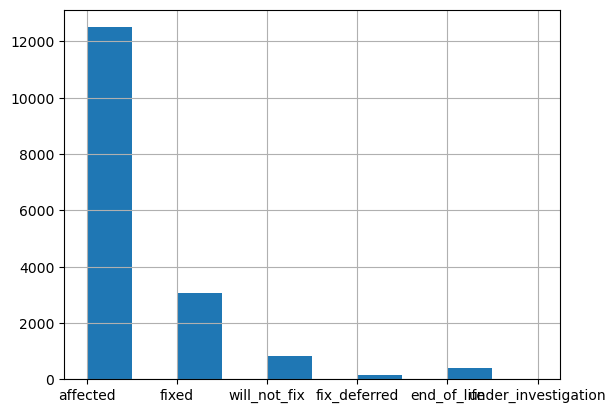

In [3]:
df['Status'].hist()

<Axes: >

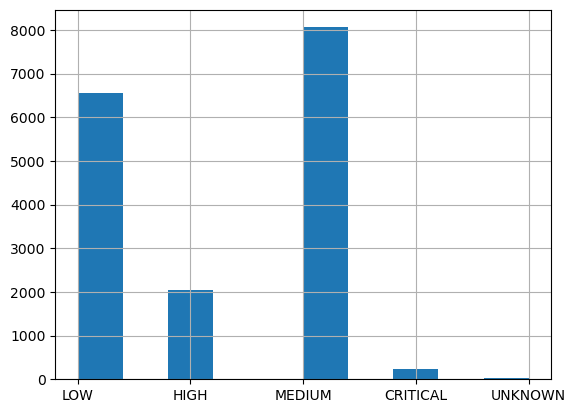

In [4]:
df['Severity'].hist()

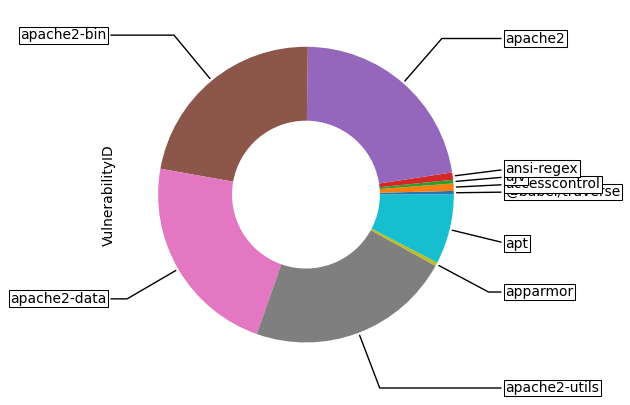

In [5]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [6]:
containers = df['Container'].unique()

In [9]:
len(df.loc[df['Severity'] == "CRITICAL"])

235